# Kvantna teleportacija

Kvantna teleportacija je protokol, kjer prenesemo kvantno stanje iz ene lokacije na drugo s pomocjo vnaprej prepletenega stanja
in klasicnega komunikacijskega kanala. Izmislili so si ga je Charles H. Bennett (IBM), Gilles Brassard, Claude Crépeau, 
Richard Jozsa, Asher Peres, and William K. Wootters in 1993. Najprej je bil demonstriran leta 1997 in je od takrat bil 
realiziran z atomi, ioni, elektroni in superprevodnimi vezji. Trenutna rekordna razdalja je 143 km preko satelita, ki je bila izvedena 2012.

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [2]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**3)
state.draw('latex')

<IPython.core.display.Latex object>

In [4]:
state = Statevector.from_int(0, 2)

qc0 = QuantumCircuit(1)
qc0.ry(np.pi/4,0)

state = state.evolve(qc0)
state.draw('latex')

<IPython.core.display.Latex object>

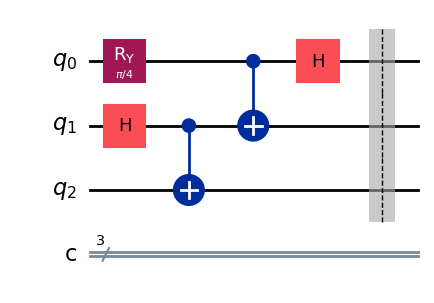

In [5]:
# Pripravi vezje:  3 kubite in 3 bite
qc = QuantumCircuit(3,3)

qc.ry(np.pi/4,0)
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)

qc.barrier()

qc.draw("mpl")

In [7]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

She now measures her two quantum states  and 

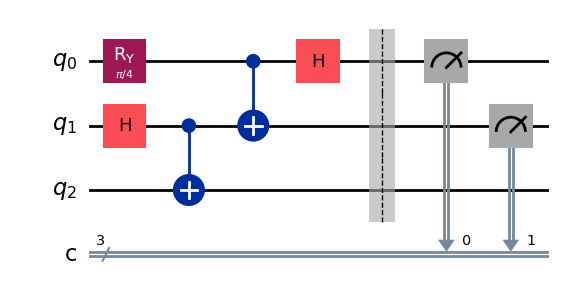

In [8]:
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")

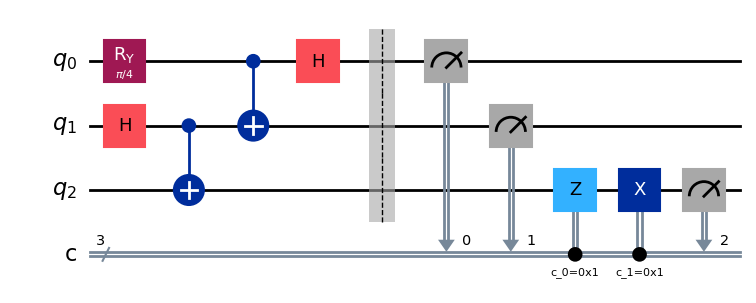

In [9]:
qc.z(2).c_if(0, 1)
qc.x(2).c_if(1, 1)

qc.measure(2, 2)

qc.draw("mpl")

Poglejmo kak Bob izmeri

In [15]:
from qiskit import transpile 
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Prvo prevedemo celotno vezje v low-level instrukcije za simulator
qc_compiled = transpile(qc, backend)

# Izvrednotimo vezje in naredimo 2048 ponovitev
job_sim = backend.run(qc_compiled, shots=4096)

# Grab the results from the job.
result_sim = job_sim.result()

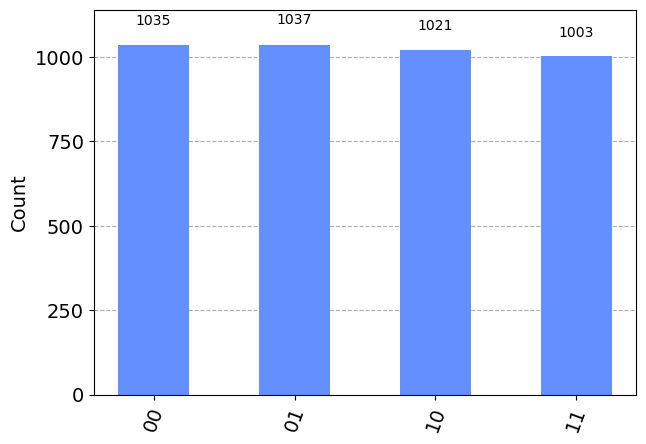

In [16]:
from qiskit.visualization import plot_histogram

# counts = result_sim.get_counts(qc_compiled)
# print(counts)

data = result_sim.get_counts(qc_compiled)
alice = {}
alice['00'] = data['000'] + data['100']
alice['10'] = data['010'] + data['110']
alice['01'] = data['001'] + data['101']
alice['11'] = data['011'] + data['111']
plot_histogram(alice)

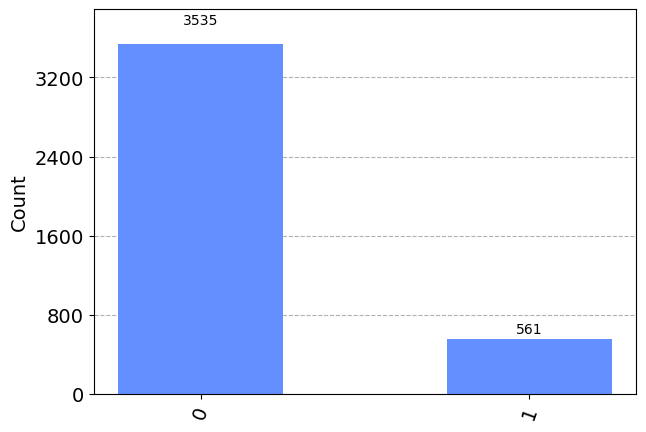

In [17]:
bob = {}
bob['0'] = data['000'] + data['010'] +  data['001'] + data['011']
bob['1'] = data['100'] + data['110'] +  data['101'] + data['111']
plot_histogram(bob)

In [21]:
561/3535

0.1586987270155587

In [19]:
(0.38268/0.92387)**2

0.17157333806425476